# Euler's vs `RK2` vs `RK4` Methods

We will be reviewing these for:

$x(t) = e^{-0.5t} sin(t) + x_0$

$x'(t) = e^{\frac{1}{2}t}(cos(t) - \frac{1}{2} sin(t))$


In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
X0 = 1

t_values = np.linspace(0, 8, 64)
t_values_limited = np.linspace(0, 8, 16)

def x(t):
    return np.sin(t) * np.exp(-0.5 * t) + X0

def x_tag(t, x):
    return (np.cos(t) - 0.5 * np.sin(t)) * np.exp(-0.5 * t)

In [70]:
# The Euler approximation

def predict_x_with_euler(t_values, x0):
    x_predicted = [x0]

    for i in range(1, len(t_values)):
        t = t_values[i]
        t_prev = t_values[i - 1]
        dt = t - t_prev

        x_prev = x_predicted[i-1]
        x = x_prev + dt * x_tag(t_prev, x_prev)

        x_predicted.append(x)

    return x_predicted

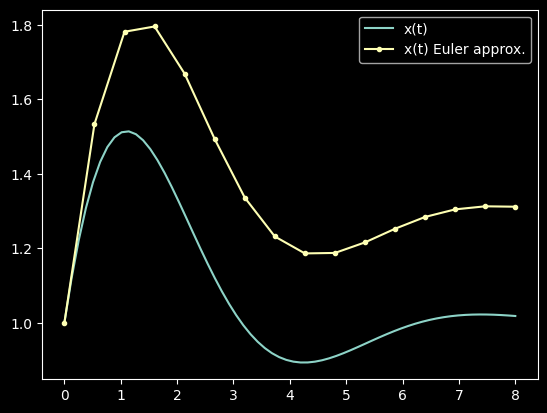

In [71]:
plt.style.use("dark_background")

plt.plot(t_values, x(t_values), label="x(t)")
plt.plot(t_values_limited, predict_x_with_euler(t_values_limited, X0), ".-", label="x(t) Euler approx.")
plt.legend()
plt.show()

In [72]:
# The RK2 approximation

def predict_x_with_rk2(t_values, x0):
    x_predicted = [x0]

    for i in range(1, len(t_values)):
        t = t_values[i]
        t_prev = t_values[i - 1]
        dt = t - t_prev

        x_prev = x_predicted[i-1]

        k0 = x_tag(t_prev, x_prev)
        k1 = x_tag(t_prev + dt/2 , x_prev + k0 * dt/2)

        x = x_prev + dt * k1

        x_predicted.append(x)

    return x_predicted

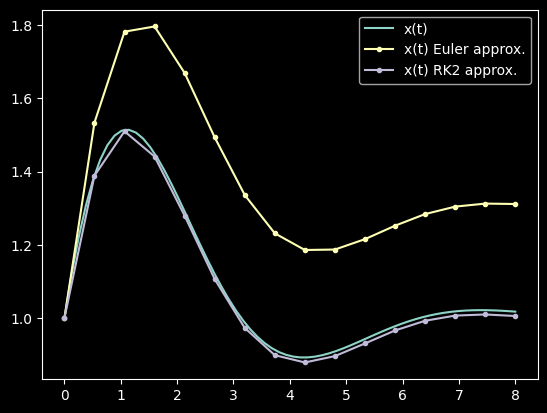

In [73]:
plt.style.use("dark_background")

plt.plot(t_values, x(t_values), label="x(t)")
plt.plot(t_values_limited, predict_x_with_euler(t_values_limited, X0), ".-", label="x(t) Euler approx.")
plt.plot(t_values_limited, predict_x_with_rk2(t_values_limited, X0), ".-", label="x(t) RK2 approx.")
plt.legend()
plt.show()

In [74]:
# The RK4 approximation

def predict_x_with_rk4(t_values, x0):
    x_predicted = [x0]

    for i in range(1, len(t_values)):
        t = t_values[i]
        t_prev = t_values[i - 1]
        dt = t - t_prev

        x_prev = x_predicted[i-1]

        k0 = x_tag(t_prev, x_prev)
        k1 = x_tag(t_prev + dt/2 , x_prev + k0 * dt/2)
        k2 = x_tag(t_prev + dt/2 , x_prev + k1 * dt/2)
        k3 = x_tag(t_prev + dt , x_prev + k2 * dt)

        x = x_prev + (dt/6) * (k0 + 2*k1 + 2*k2 + k3)

        x_predicted.append(x)

    return x_predicted

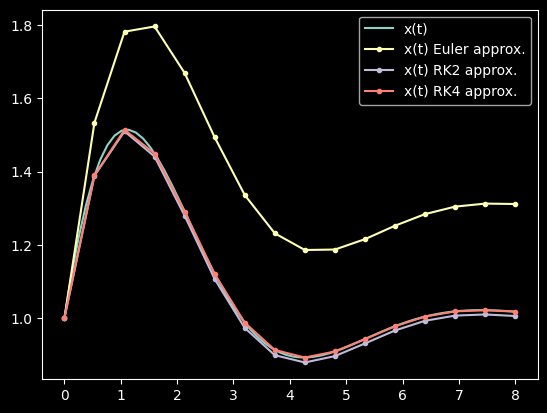

In [75]:
plt.style.use("dark_background")

plt.plot(t_values, x(t_values), label="x(t)")
plt.plot(t_values_limited, predict_x_with_euler(t_values_limited, X0), ".-", label="x(t) Euler approx.")
plt.plot(t_values_limited, predict_x_with_rk2(t_values_limited, X0), ".-", label="x(t) RK2 approx.")
plt.plot(t_values_limited, predict_x_with_rk4(t_values_limited, X0), ".-", label="x(t) RK4 approx.")
plt.legend()
plt.show()

## Conclusions:
- Euler performed pretty horribly in plain-sight, but it can actually be an ok approximation in some cases.
- `RK2` perfomed very well, in fact it can be enough in many cases.
- `RK4` as we can see is very stable and accurate, usually there is never a need for `RK5` or higher orders.